# Recognition of handwritten digit: A neural network approach

Handwritten digit recognition is a good first-lesson on image recognition for beginners.
<br />  
The MNIST dataset consists 60000 training examples and 10000 test examples, of digits 0-9, can be downloaded from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/).
<br />  
In this project we will:

- Implement a 2-layer neural network.
- Compute the forward pass and backward pass with svm loss.
- Use the normlizaiton to help network converge.
- Use a stochastic gradient descent to optimize the loss function.

In [1]:
from data_utils import loadMNIST

from __future__ import print_function
from two_layer_net import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load the data
Load the MNIST data to train a neural network. The data is located at `'dataset/'` directory, you should download the 4 ubyte files from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/) and unextract it in the right directory before loading. Dataset directory may vary when you change the location of you project folder, or use a different operating system. Make sure to modify `data_utils.py` when you change the dataset location.

In [2]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

print("Loaded training images of shape:", X_train.shape)
print("Loaded training labels of shape:", y_train.shape)
print("Loaded test images of shape", X_test.shape)
print("Loaded test labels of shape", y_test.shape)

Loaded training images of shape: (60000, 28, 28)
Loaded training labels of shape: (60000,)
Loaded test images of shape (10000, 28, 28)
Loaded test labels of shape (10000,)


# Show some random images
Show some random images to get a gut feeling of how the data looks like.
Make sure `row * col` is less than the size of training set example number.
To adjust the size of plot size, just modify: `plt.rcParams['figure.figsize']` on the first code block.

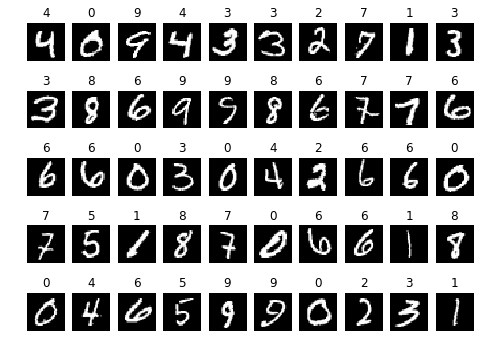

In [3]:
row, col = 5, 10
idx = np.random.choice(X_train.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title(y_train[plt_idx])
        plt.imshow(X_train[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Preprocess the data
## Part.1
In this part, we preprocess the data by:

- Split training set data to train and validation.
- Normalize the data

In [4]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

# Split the data into train, val, and test sets. 
num_training = 50000
num_validation = 10000
num_test = 10000

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]


# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 28, 28)
Train labels shape:  (50000,)
Validation data shape:  (10000, 28, 28)
Validation labels shape:  (10000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


## Part.2
Reshape the 3 dimension data to a `[N * (row * col)]` 2 dimension matrix.
`N` is the number of examples, `(row, col)` is the shape of an example image.

In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (50000, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


# Overfit Small Dataset
Training with a small dataset, i.e. a training set with 500 example images, we should see an overfitting model.

In [14]:
# Preprocessing: reshape the image data into rows
X_train_small = X_train[:500, :]
y_train_small = y_train[:500]
# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train_small.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (500, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


In [15]:
input_size = 28 * 28
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 2000: loss 9.000169 val_acc 0.185800
iteration 100 / 2000: loss 1.323087 val_acc 0.764200
iteration 200 / 2000: loss 0.355503 val_acc 0.830200
iteration 300 / 2000: loss 0.196960 val_acc 0.843800
iteration 400 / 2000: loss 0.169082 val_acc 0.851800
iteration 500 / 2000: loss 0.129826 val_acc 0.854600
iteration 600 / 2000: loss 0.085085 val_acc 0.857200
iteration 700 / 2000: loss 0.103751 val_acc 0.857800
iteration 800 / 2000: loss 0.090848 val_acc 0.859200
iteration 900 / 2000: loss 0.106374 val_acc 0.859000
iteration 1000 / 2000: loss 0.114303 val_acc 0.859200
iteration 1100 / 2000: loss 0.095383 val_acc 0.859600
iteration 1200 / 2000: loss 0.100958 val_acc 0.859400
iteration 1300 / 2000: loss 0.096522 val_acc 0.859900
iteration 1400 / 2000: loss 0.124669 val_acc 0.860000
iteration 1500 / 2000: loss 0.124599 val_acc 0.860200
iteration 1600 / 2000: loss 0.120101 val_acc 0.860300
iteration 1700 / 2000: loss 0.101595 val_acc 0.860100
iteration 1800 / 2000: loss 0.105940 val

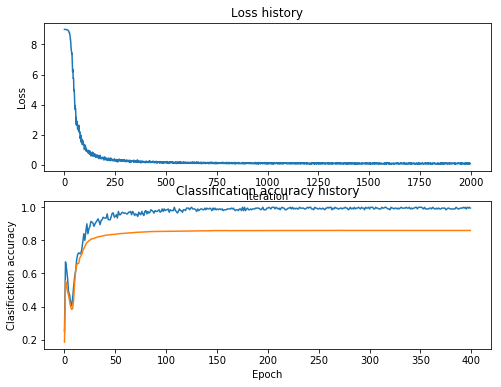

In [16]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Training
Train a two layer neural network, update gradients with mini-batch data, optimize the loss with SGD.


In [17]:
input_size = 28 * 28
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=12000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train) == y_train).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 12000: loss 9.000639 val_acc 0.204500
iteration 100 / 12000: loss 2.006562 val_acc 0.792400
iteration 200 / 12000: loss 0.654294 val_acc 0.880000
iteration 300 / 12000: loss 0.437803 val_acc 0.898900
iteration 400 / 12000: loss 0.479634 val_acc 0.909900
iteration 500 / 12000: loss 0.390197 val_acc 0.916800
iteration 600 / 12000: loss 0.379241 val_acc 0.920800
iteration 700 / 12000: loss 0.429407 val_acc 0.924800
iteration 800 / 12000: loss 0.708429 val_acc 0.927000
iteration 900 / 12000: loss 0.383996 val_acc 0.930900
iteration 1000 / 12000: loss 0.373969 val_acc 0.934200
iteration 1100 / 12000: loss 0.382534 val_acc 0.935500
iteration 1200 / 12000: loss 0.334708 val_acc 0.937600
iteration 1300 / 12000: loss 0.426768 val_acc 0.939000
iteration 1400 / 12000: loss 0.401797 val_acc 0.940900
iteration 1500 / 12000: loss 0.368052 val_acc 0.943300
iteration 1600 / 12000: loss 0.223509 val_acc 0.944000
iteration 1700 / 12000: loss 0.199806 val_acc 0.945200
iteration 1800 / 12000

# Debug the training
The loss history indicates whether loss is converging.
Overfitting or underfitting can be observed from classification accuracy history.
If there is a big gap between training accuracy and validation accuracy curves, the model is highly possible overfitting. Else if the training accuracy is low, and validation accuracy alike, the model might be underfitting.
To avoid such occasions, fine tune the parameters with your observation on the plots.

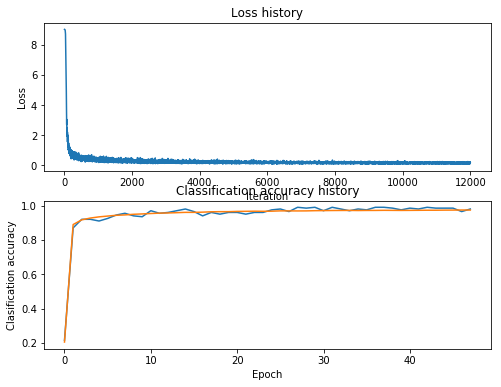

In [18]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Performance of the model
Now it's time to finally evaluate our model, with test set data.

In [19]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9728


# Show some random image and predict using our model

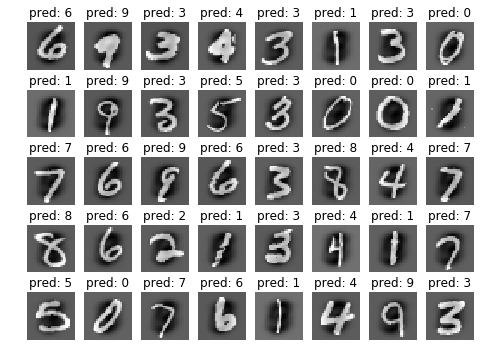

In [20]:
row, col = 5, 8
y_test_pred = net.predict(X_test)
X_test_image = X_test.reshape(-1, 28, 28)
idx = np.random.choice(X_test.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title('pred: ' + str(y_test_pred[plt_idx]))
        plt.imshow(X_test_image[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Acknowledgment
Some of the code and structure is copied from Stanford course [CS231n](https://cs231n.github.io) assignments. Lectured by Fei-Fei Li, Andrej Karpathy, Justion Johnson and Serena Yeung